In [2]:
import zipfile

with zipfile.ZipFile("cybersecurity project.zip", "r") as zip_ref:
    zip_ref.extractall(".")


In [3]:
import pandas as pd
import glob
import os


In [4]:
import os, glob
import pandas as pd

def load_and_label(path, label):
    # look for files in this folder AND all subfolders
    pattern_pcap = os.path.join(path, "**", "*.pcap")
    pattern_csv  = os.path.join(path, "**", "*.csv")

    files = glob.glob(pattern_pcap, recursive=True) + glob.glob(pattern_csv, recursive=True)

    print("Path:", path)
    print("Found", len(files), "files:")
    for f in files:
        print("  ", f)

    df_list = []
    for f in files:
        df = pd.read_csv(f)
        df["label"] = label
        df_list.append(df)

    if not df_list:
        raise ValueError(f"No files found in {path}")

    return pd.concat(df_list, ignore_index=True)


In [5]:
BASE = "cybersecurity project"

# benign from all three places:
benign_main   = load_and_label(os.path.join(BASE, "Benign"), 0)
benign_heavy  = load_and_label(os.path.join(BASE, "attack heavy", "benign"), 0)
benign_light  = load_and_label(os.path.join(BASE, "attack light", "benign"), 0)

benign = pd.concat([benign_main, benign_heavy, benign_light], ignore_index=True)

benign.head()


Path: cybersecurity project\Benign
Found 8 files:
   cybersecurity project\Benign\stateful_features-benign_1.pcap.csv
   cybersecurity project\Benign\stateful_features-benign_2.pcap.csv
   cybersecurity project\Benign\stateless_features-benign_1.pcap.csv
   cybersecurity project\Benign\stateless_features-benign_2.pcap.csv
   cybersecurity project\Benign\Benign\stateful_features-benign_1.pcap.csv
   cybersecurity project\Benign\Benign\stateful_features-benign_2.pcap.csv
   cybersecurity project\Benign\Benign\stateless_features-benign_1.pcap.csv
   cybersecurity project\Benign\Benign\stateless_features-benign_2.pcap.csv
Path: cybersecurity project\attack heavy\benign
Found 6 files:
   cybersecurity project\attack heavy\benign\stateful_features-benign_heavy_1.pcap.csv
   cybersecurity project\attack heavy\benign\stateful_features-benign_heavy_2.pcap.csv
   cybersecurity project\attack heavy\benign\stateful_features-benign_heavy_3.pcap.csv
   cybersecurity project\attack heavy\benign\state

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Load attack data
attack_light = load_and_label(os.path.join(BASE, "attack light", "attacks"), 1)
attack_heavy = load_and_label(os.path.join(BASE, "attack heavy", "attacks"), 2)


Path: cybersecurity project\attack light\attacks
Found 12 files:
   cybersecurity project\attack light\attacks\stateful_features-light_audio.pcap.csv
   cybersecurity project\attack light\attacks\stateful_features-light_compressed.pcap.csv
   cybersecurity project\attack light\attacks\stateful_features-light_exe.pcap.csv
   cybersecurity project\attack light\attacks\stateful_features-light_image.pcap.csv
   cybersecurity project\attack light\attacks\stateful_features-light_text.pcap.csv
   cybersecurity project\attack light\attacks\stateful_features-light_video.pcap.csv
   cybersecurity project\attack light\attacks\stateless_features-light_audio.pcap.csv
   cybersecurity project\attack light\attacks\stateless_features-light_compressed.pcap.csv
   cybersecurity project\attack light\attacks\stateless_features-light_exe.pcap.csv
   cybersecurity project\attack light\attacks\stateless_features-light_image.pcap.csv
   cybersecurity project\attack light\attacks\stateless_features-light_text.

In [7]:
final_df = pd.concat([benign, attack_light, attack_heavy], ignore_index=True)


In [8]:
final_df.to_csv("dns_exfil_dataset.csv", index=False)


In [9]:
final_df.head()
final_df.shape


(1327387, 43)

In [10]:
# 1. See basic info
final_df.info()

# 2. See how many samples in each class
print("\nLabel counts:")
print(final_df["label"].value_counts())

# 3. Check missing values in each column
print("\nMissing values per column:")
print(final_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327387 entries, 0 to 1327386
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   rr                349103 non-null   float64
 1   A_frequency       349103 non-null   float64
 2   NS_frequency      349103 non-null   float64
 3   CNAME_frequency   349103 non-null   float64
 4   SOA_frequency     349103 non-null   float64
 5   NULL_frequency    349103 non-null   float64
 6   PTR_frequency     349103 non-null   float64
 7   HINFO_frequency   349103 non-null   float64
 8   MX_frequency      349103 non-null   float64
 9   TXT_frequency     349103 non-null   float64
 10  AAAA_frequency    349103 non-null   float64
 11  SRV_frequency     349103 non-null   float64
 12  OPT_frequency     349103 non-null   float64
 13  rr_type           349103 non-null   object 
 14  rr_count          349103 non-null   float64
 15  rr_name_entropy   349103 non-null   float64
 16  

In [11]:
df = final_df.drop(columns=["timestamp", "longest_word", "sld", "rr_type",
                            "distinct_ip", "unique_country", "unique_asn",
                            "distinct_domains", "reverse_dns", "unique_ttl"])


In [12]:
df = df.fillna(0)


In [13]:
df.shape
df.head()


,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain
0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.shape


(1327387, 33)

In [15]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and label (y)
X = df.drop(columns=["label"])
y = df["label"]

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test
    random_state=42,
    stratify=y          # keep class balance
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Features shape: (1327387, 32)
Labels shape: (1327387,)
Train shape: (1061909, 32) (1061909,)
Test shape: (265478, 32) (265478,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7171178026051123

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83    189943
           1       0.23      0.00      0.00     10795
           2       0.50      0.06      0.10     64740

    accuracy                           0.72    265478
   macro avg       0.48      0.35      0.31    265478
weighted avg       0.65      0.72      0.62    265478


Confusion Matrix:
[[186782      9   3152]
 [ 10330      5    460]
 [ 61140      8   3592]]


In [17]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7169859649387144

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.98      0.83    189943
           1       0.33      0.00      0.00     10795
           2       0.50      0.05      0.10     64740

    accuracy                           0.72    265478
   macro avg       0.52      0.35      0.31    265478
weighted avg       0.65      0.72      0.62    265478


Confusion Matrix:
[[186787      3   3153]
 [ 10328      4    463]
 [ 61182      5   3553]]


In [22]:
benign_df = df[df['label'] == 0].sample(120000, random_state=42)
light_df  = df[df['label'] == 1]
heavy_df  = df[df['label'] == 2]

df_small = pd.concat([benign_df, light_df, heavy_df], ignore_index=True)


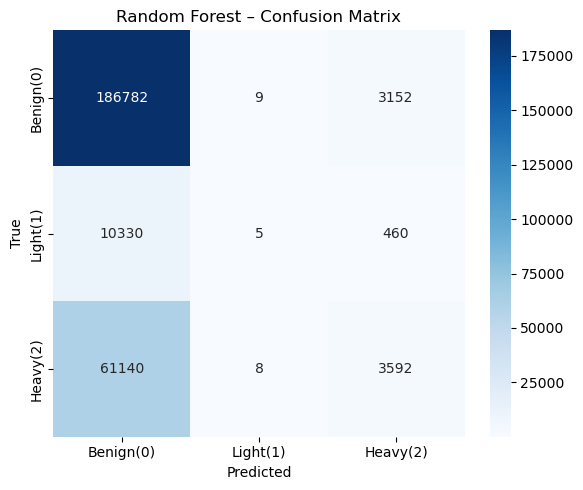

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict again (just to be sure)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Benign(0)', 'Light(1)', 'Heavy(2)'],
            yticklabels=['Benign(0)', 'Light(1)', 'Heavy(2)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest – Confusion Matrix')
plt.tight_layout()
plt.show()


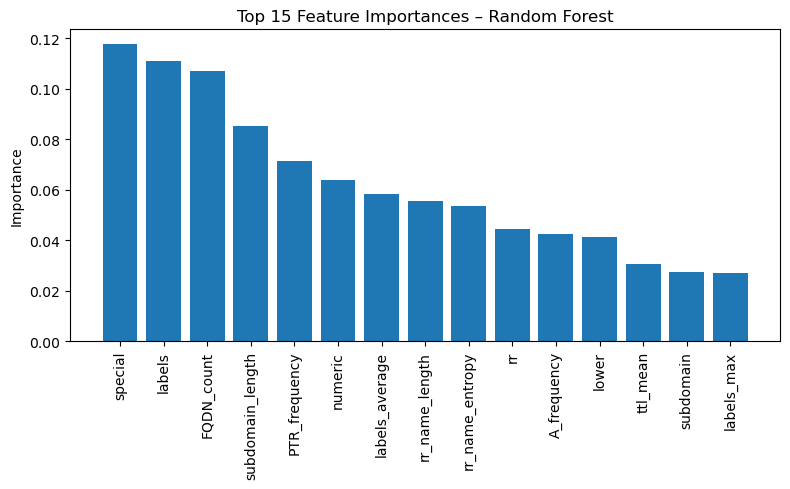

In [27]:
import numpy as np

# Get feature importances from RF
importances = rf.feature_importances_
feature_names = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1][:15]   # top 15 features

plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.ylabel('Importance')
plt.title('Top 15 Feature Importances – Random Forest')
plt.tight_layout()
plt.show()


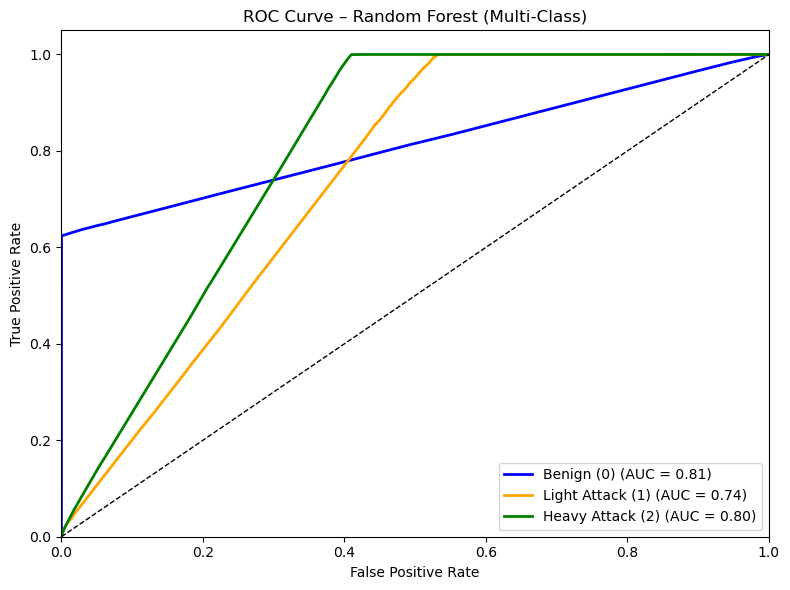

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import numpy as np

# ----- Prepare labels for multi-class ROC -----
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

# ----- Predict probabilities -----
y_score = rf.predict_proba(X_test)

# ----- Compute ROC curve and AUC for each class -----
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ----- Plot ROC -----
plt.figure(figsize=(8,6))

colors = ['blue', 'orange', 'green']
class_names = ['Benign (0)', 'Light Attack (1)', 'Heavy Attack (2)']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest (Multi-Class)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
